## 3.基于ARIMA回归模型的股票价格预测

In [1]:
%matplotlib inline 
import pandas as pd
import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock = pd.read_csv('./data/data_stock1.csv', index_col=0, parse_dates=[0],encoding='gbk')  
stock

,开盘价,最高点,最低点,收盘价
日期,,,,
2000-01-03,6.498,6.603,6.498,6.548
2000-01-04,6.530,6.548,6.485,6.485
2000-01-05,6.521,6.599,6.508,6.599
2000-01-06,6.558,6.585,6.540,6.549
2000-01-07,6.545,6.595,6.504,6.504
...,...,...,...,...
2016-07-25,1.584,1.584,1.554,1.571
2016-07-26,1.559,1.587,1.549,1.563
2016-07-27,1.570,1.570,1.511,1.515


In [3]:
stock_week = stock['收盘价'].resample('W-MON').mean()
stock_week

日期
2000-01-03    6.54800
2000-01-10    6.53900
2000-01-17    6.66300
2000-01-24    6.73720
2000-01-31    6.67280
               ...   
2016-07-04    1.47050
2016-07-11    1.38780
2016-07-18    1.53860
2016-07-25    1.56880
2016-08-01    1.51175
Freq: W-MON, Name: 收盘价, Length: 866, dtype: float64

In [4]:
stock_train = stock_week['2000':'2014']

Text(0, 0.5, '股票收盘价')

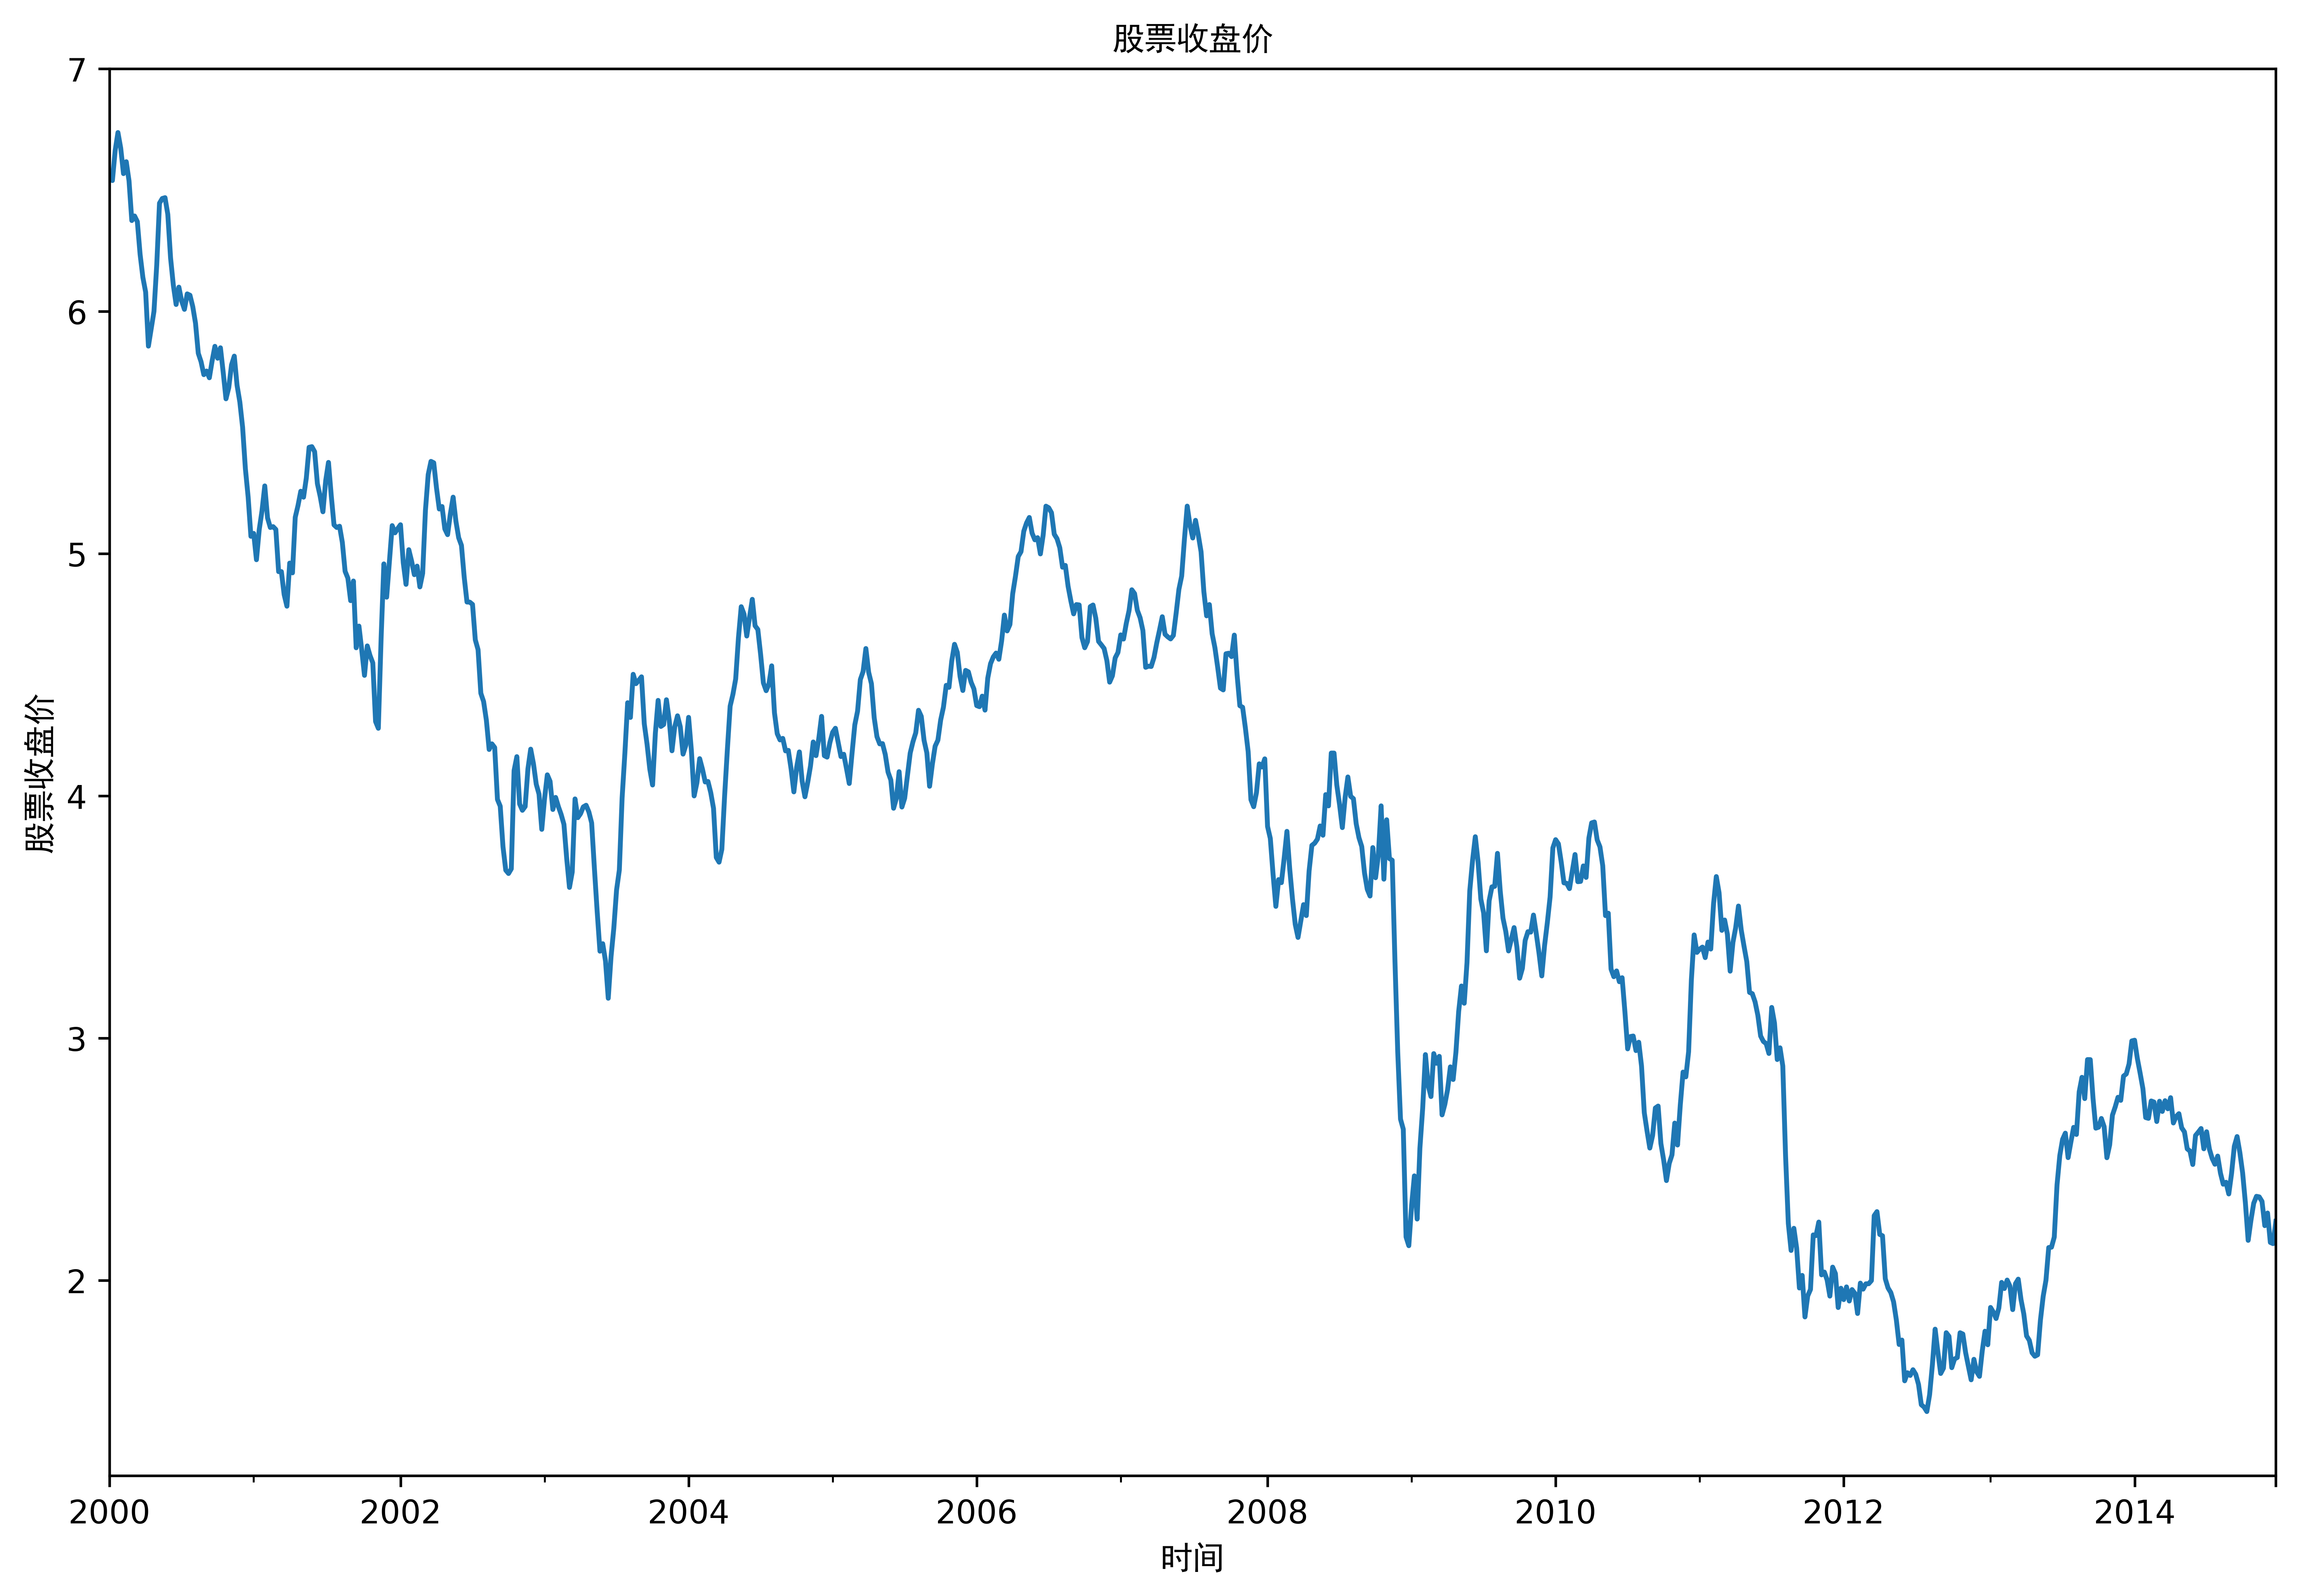

In [9]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf')
plt.figure(figsize=(12,8),dpi=600)
stock_train.plot()
plt.title('股票收盘价',fontproperties=myfont)
plt.xlabel('时间',fontproperties=myfont)
plt.ylabel('股票收盘价',fontproperties=myfont)

In [6]:
from statsmodels.tsa.stattools import adfuller 
dftest = adfuller(stock_train)
dftest[1]

0.2261027835971947

In [7]:
stock_diff_1 = stock_train.diff()
stock_diff_1

日期
2000-01-03       NaN
2000-01-10   -0.0090
2000-01-17    0.1240
2000-01-24    0.0742
2000-01-31   -0.0644
               ...  
2014-12-01   -0.1001
2014-12-08    0.0521
2014-12-15   -0.1214
2014-12-22   -0.0050
2014-12-29    0.0923
Freq: W-MON, Name: 收盘价, Length: 783, dtype: float64

In [8]:
stock_diff = stock_diff_1.dropna()
stock_diff

日期
2000-01-10   -0.0090
2000-01-17    0.1240
2000-01-24    0.0742
2000-01-31   -0.0644
2000-02-07   -0.1052
               ...  
2014-12-01   -0.1001
2014-12-08    0.0521
2014-12-15   -0.1214
2014-12-22   -0.0050
2014-12-29    0.0923
Freq: W-MON, Name: 收盘价, Length: 782, dtype: float64

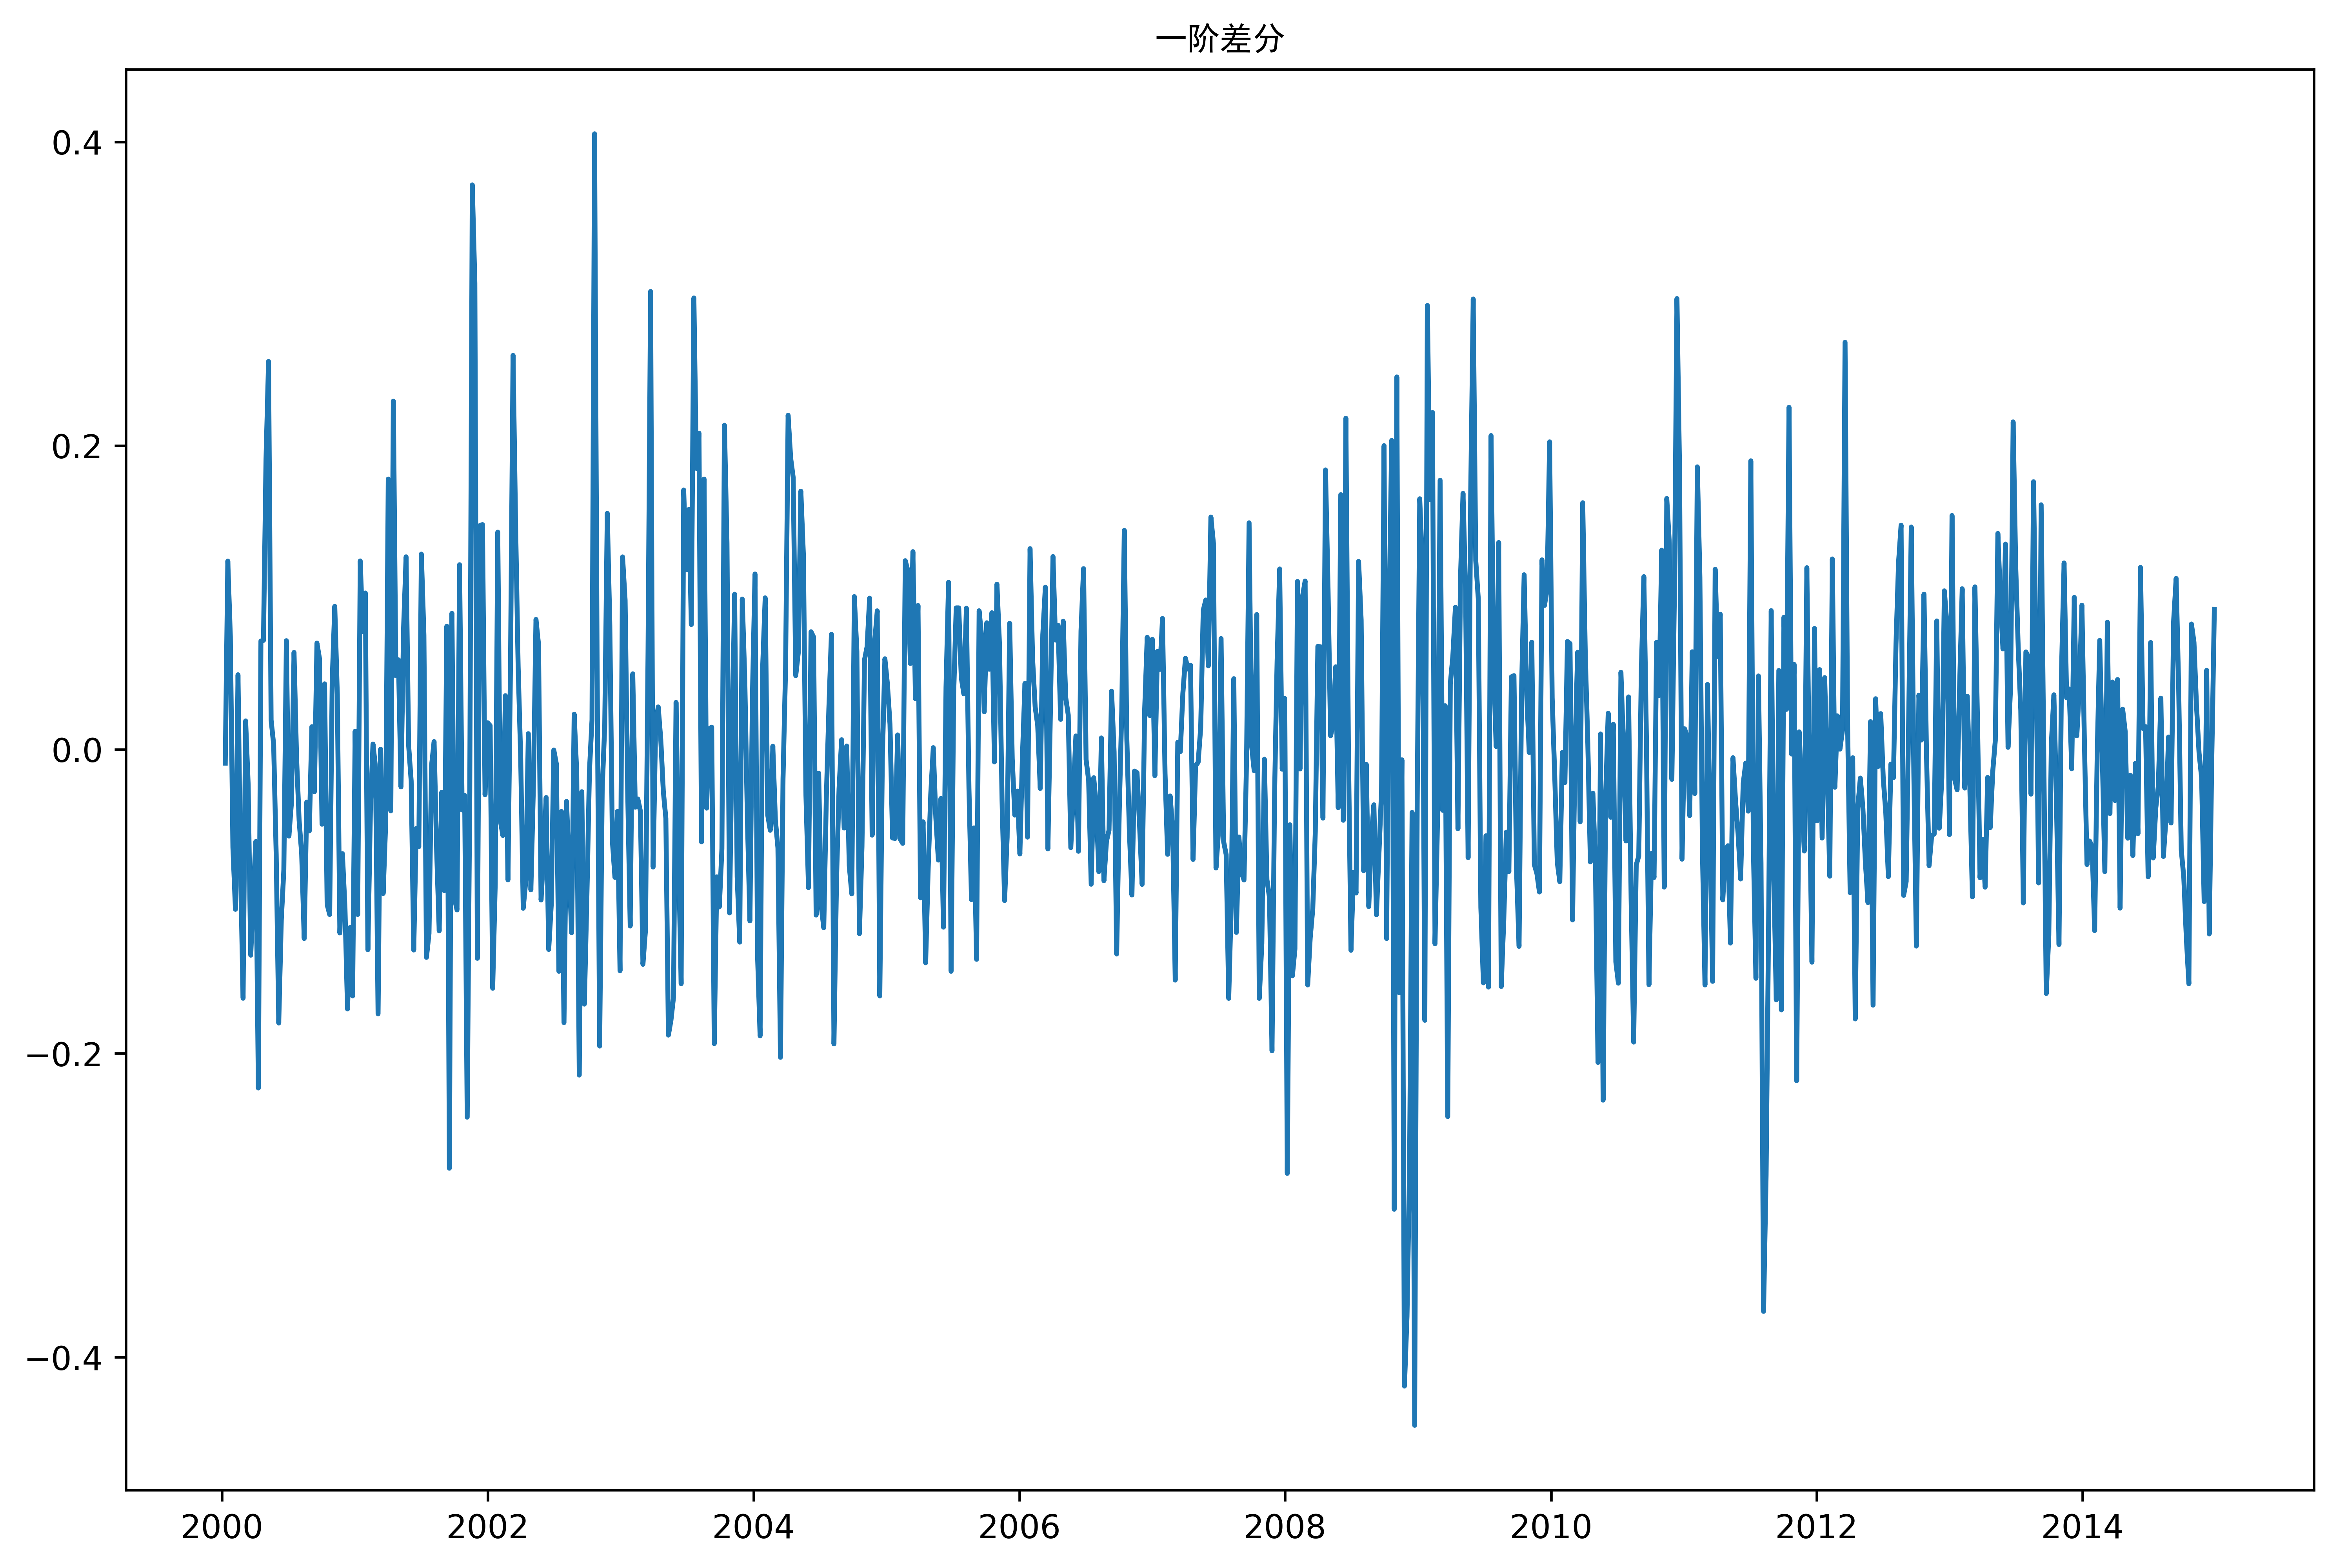

In [9]:
plt.figure(figsize=(12,8),dpi=600)
plt.plot(stock_diff)
plt.title('一阶差分',fontproperties=myfont)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller #再次adf检验
dftest = adfuller(stock_diff)
dftest[1]

0.0

<Figure size 3600x2400 with 0 Axes>

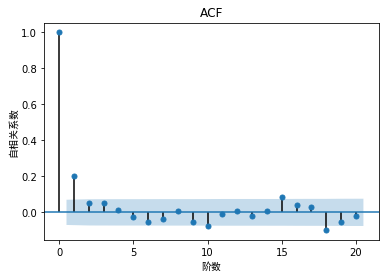

In [11]:
plt.figure(dpi=600)
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
plt.xlabel("阶数",fontproperties=myfont)
plt.ylabel("自相关系数",fontproperties=myfont)
acf.show()

<Figure size 3600x2400 with 0 Axes>

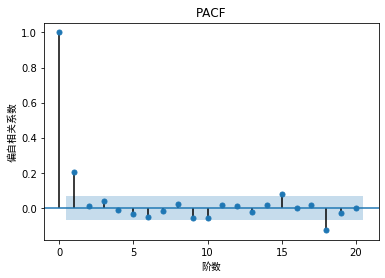

In [12]:
plt.figure(dpi=600)
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
plt.xlabel("阶数",fontproperties=myfont)
plt.ylabel("偏自相关系数",fontproperties=myfont)
pacf.show()#展示

In [13]:
import statsmodels.api as sm
res = sm.tsa.arma_order_select_ic(stock_diff,max_ar = 5,max_ma = 5,ic = ['aic']) 
res.aic_min_order

(2, 3)

In [14]:
model = ARIMA(stock_train, order = (1,1,1),freq='W-MON')
result_1 = model.fit()

In [16]:
pred_1 = result_1.predict('20140609', '20160627',dynamic=True, typ='levels') 
print (pred_1)

2014-06-09    2.463146
2014-06-16    2.454620
2014-06-23    2.448235
2014-06-30    2.442495
2014-07-07    2.436947
                ...   
2016-05-30    1.895959
2016-06-06    1.890495
2016-06-13    1.885031
2016-06-20    1.879567
2016-06-27    1.874103
Freq: W-MON, Length: 108, dtype: float64


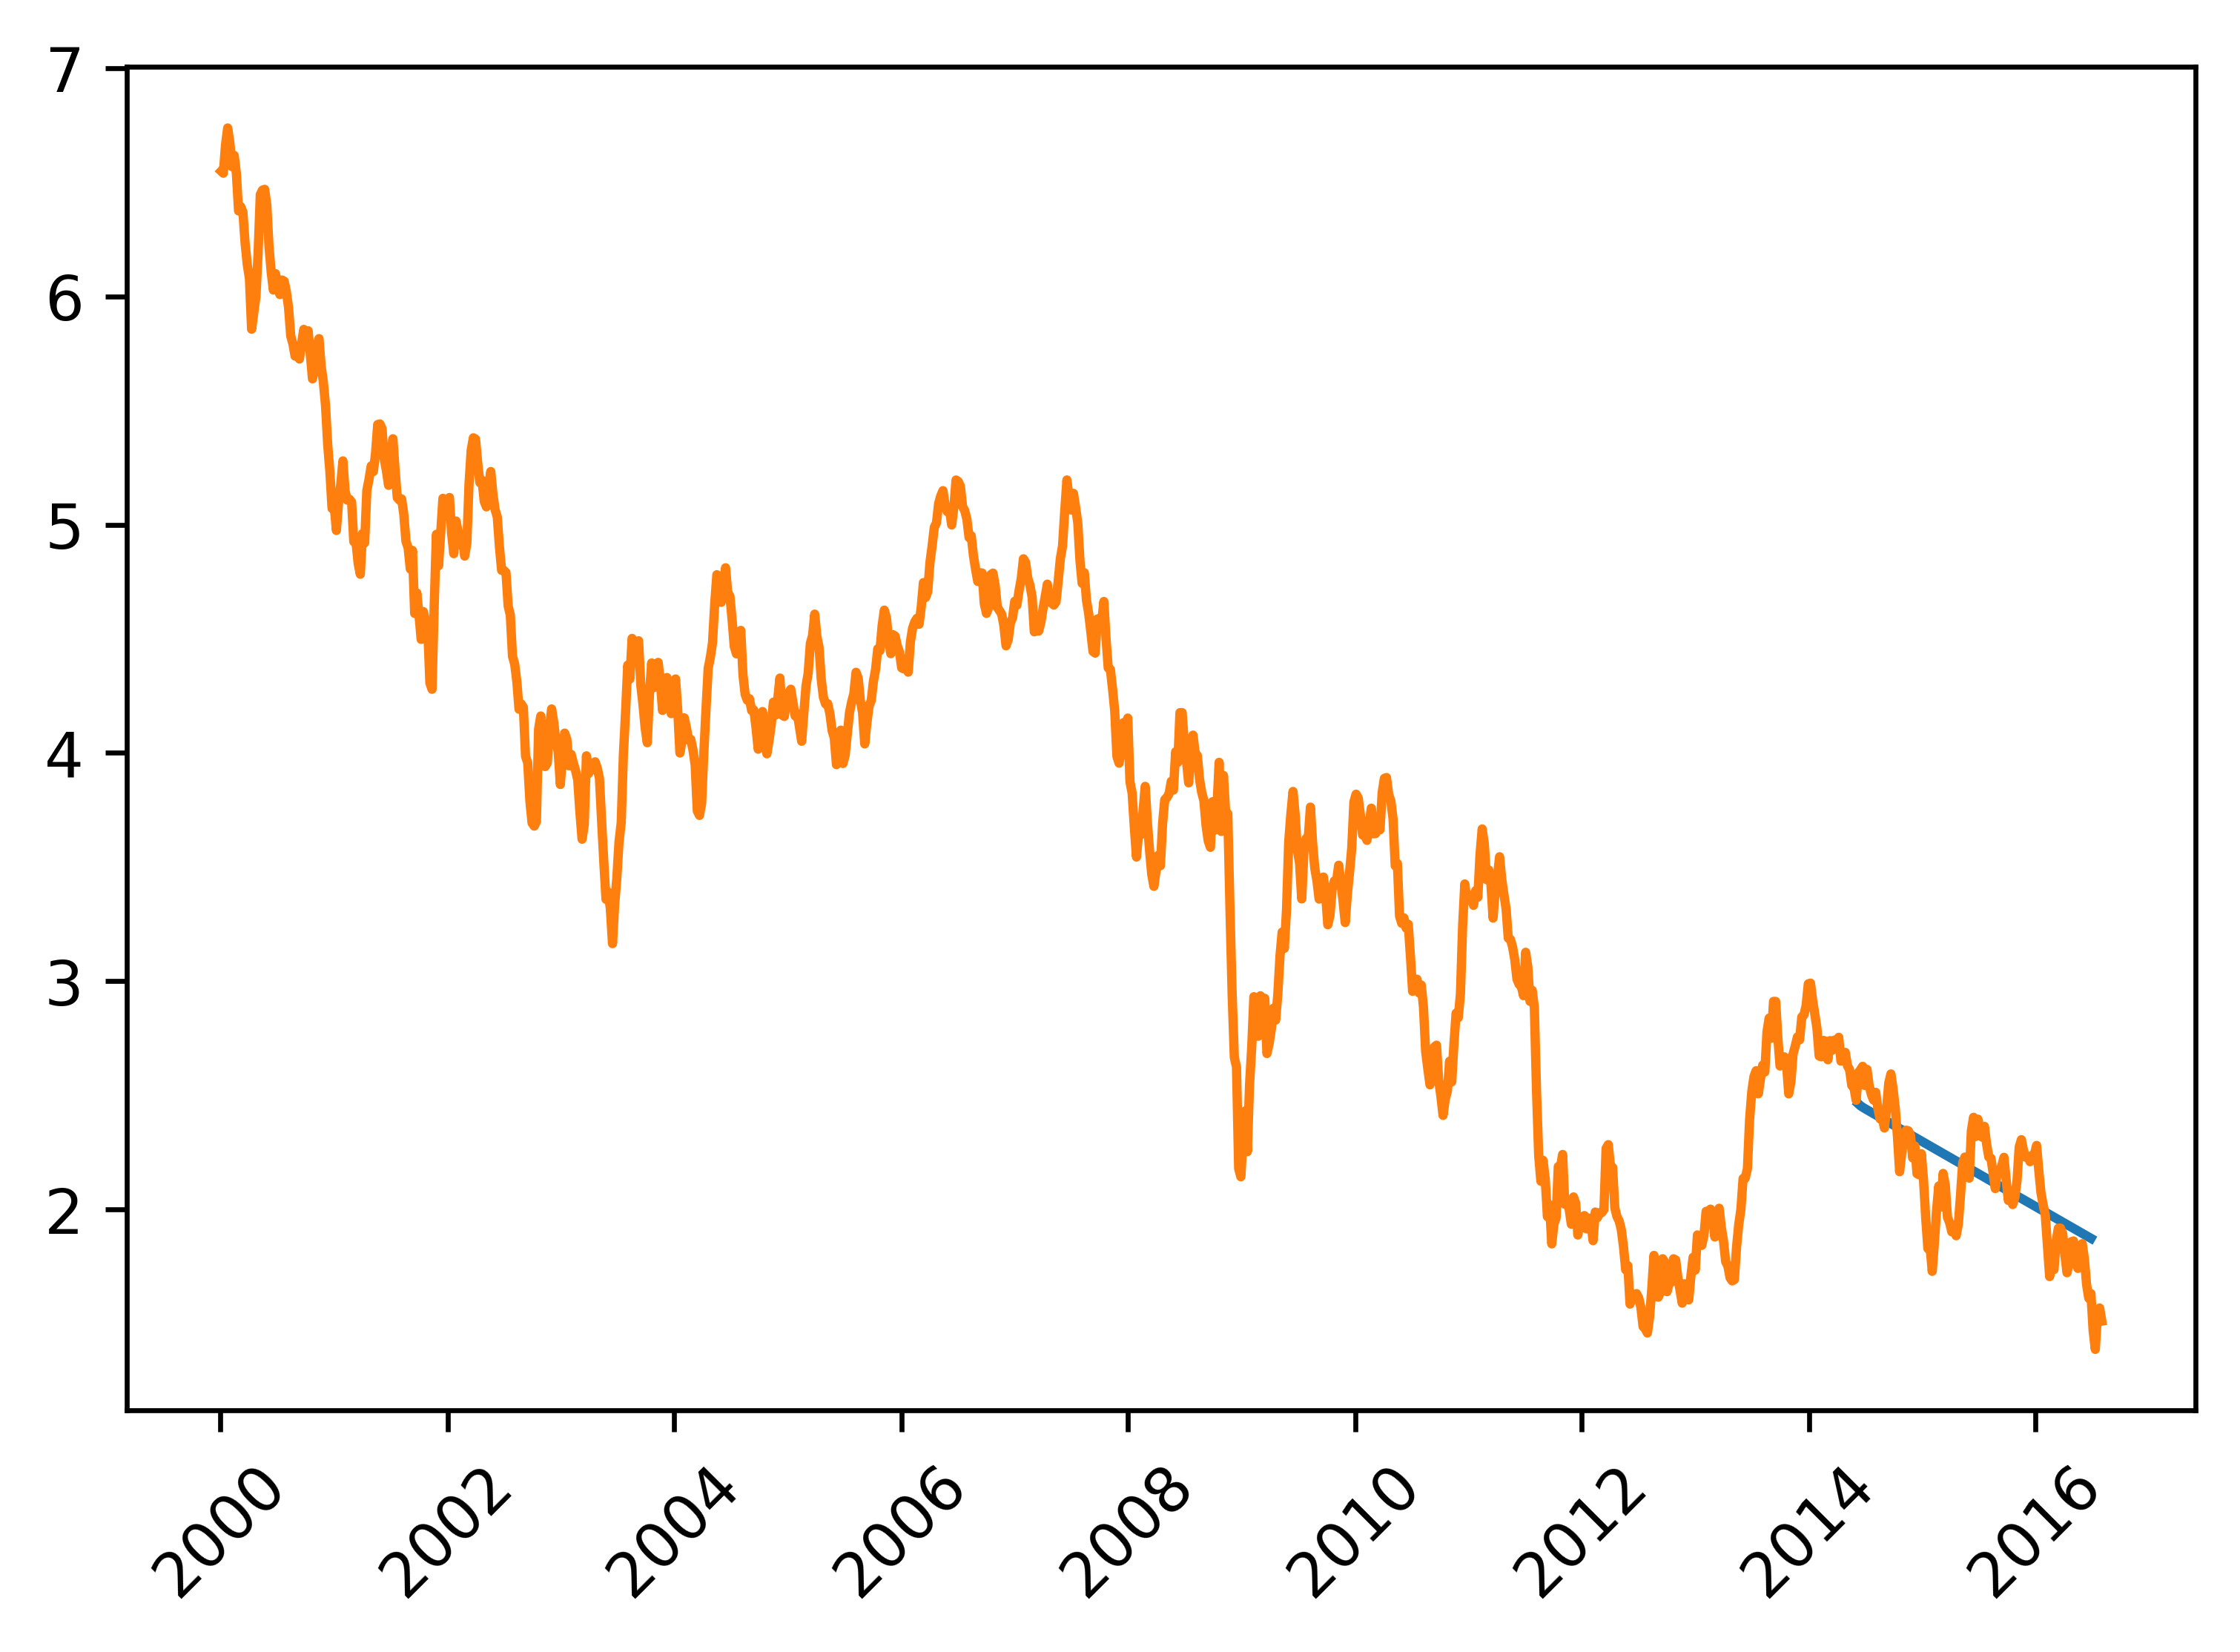

In [17]:
plt.figure(dpi=600)
plt.xticks(rotation=45) 
plt.plot(pred_1) 
plt.plot(stock_week) 

In [18]:
model = ARIMA(stock_train, order = (2,1,3),freq='W-MON')
result_2 = model.fit()

In [19]:
pred_2 = result_2.predict('20140609', '20160627',dynamic=True, typ='levels') 
print (pred_2)

2014-06-09    2.487256
2014-06-16    2.497370
2014-06-23    2.485487
2014-06-30    2.456189
2014-07-07    2.426355
                ...   
2016-05-30    1.928403
2016-06-06    1.905816
2016-06-13    1.878414
2016-06-20    1.861691
2016-06-27    1.863538
Freq: W-MON, Length: 108, dtype: float64


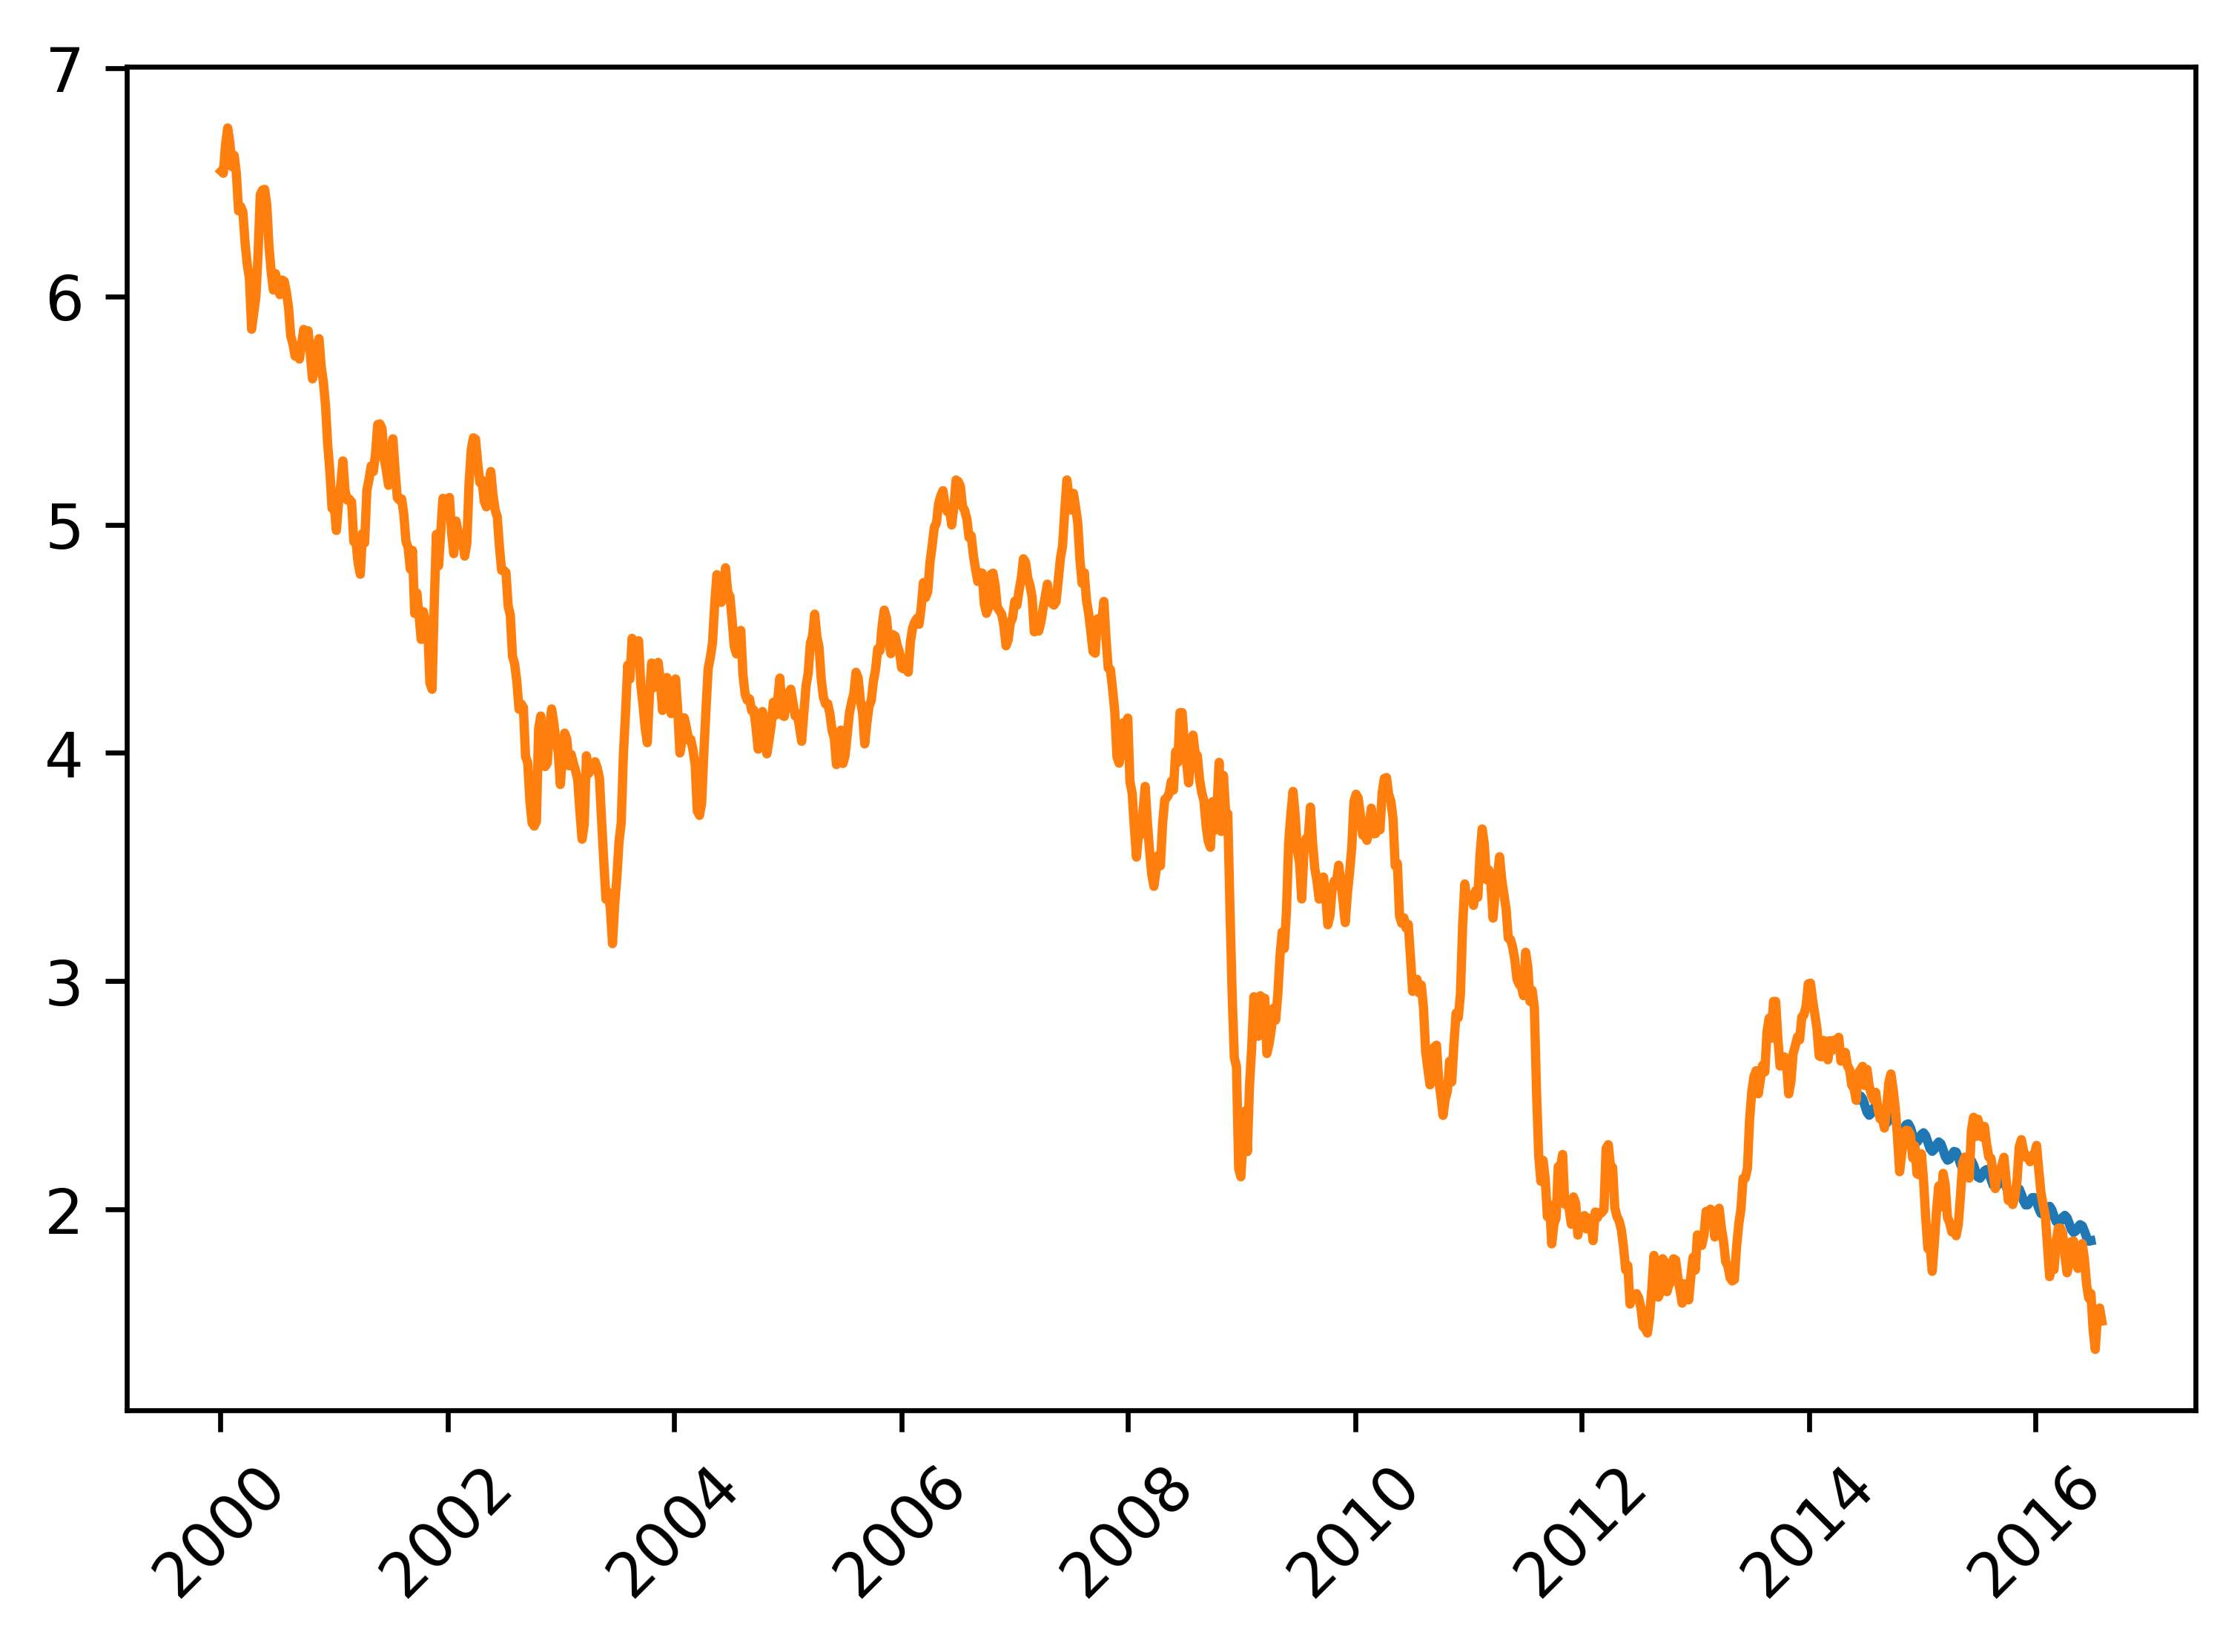

In [20]:
plt.figure(dpi=600)
plt.xticks(rotation=45)
plt.plot(pred_2) 
plt.plot(stock_week) 

In [21]:
stock_actual = stock_week['20140609':'20160627']
print(stock_actual)

日期
2014-06-09    2.59860
2014-06-16    2.61240
2014-06-23    2.62740
2014-06-30    2.54360
2014-07-07    2.61400
               ...   
2016-05-30    1.85075
2016-06-06    1.78360
2016-06-13    1.67080
2016-06-20    1.61180
2016-06-27    1.63200
Freq: W-MON, Name: 收盘价, Length: 108, dtype: float64


In [22]:
print(pred_1)

2014-06-09    2.463146
2014-06-16    2.454620
2014-06-23    2.448235
2014-06-30    2.442495
2014-07-07    2.436947
                ...   
2016-05-30    1.895959
2016-06-06    1.890495
2016-06-13    1.885031
2016-06-20    1.879567
2016-06-27    1.874103
Freq: W-MON, Length: 108, dtype: float64


In [25]:
error_1=pow(stock_actual-pred_1,2)
MSE1=error_1.sum()/len(pred_1)
print(MSE1)

0.03225400500305075


In [26]:
print(pred_2)

2014-06-09    2.487256
2014-06-16    2.497370
2014-06-23    2.485487
2014-06-30    2.456189
2014-07-07    2.426355
                ...   
2016-05-30    1.928403
2016-06-06    1.905816
2016-06-13    1.878414
2016-06-20    1.861691
2016-06-27    1.863538
Freq: W-MON, Length: 108, dtype: float64


In [27]:
error_2=pow(stock_actual-pred_2,2)
MSE2=error_2.sum()/len(pred_2)
print(MSE2)

0.032356595477552326
